In [141]:
import pandas as pd

In [142]:
# 1 read data
df = pd.read_csv('train.csv')
df.head(8)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [143]:
# 2 calculate the number of surviving/non-surviving passengers
survivors = df[df['Survived']==1]
print('survivors', survivors['Survived'].count())

non_survivors = df[df['Survived']==0]
print('non survivors', non_survivors['Survived'].count())

survivors 342
non survivors 549


Text(0.5, 1.0, 'Number of surviving/non-surviving passengers')

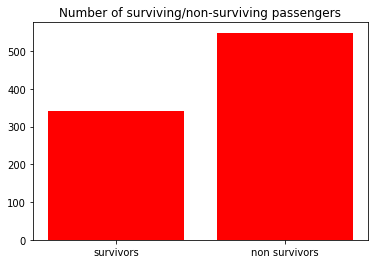

In [144]:
# display it as a barplot
import numpy as np
from matplotlib import pyplot as plt 
#height = [342, 549]
height = [survivors['Survived'].count(), non_survivors['Survived'].count()]
bars = ('survivors', 'non survivors')
y_pos = np.arange(len(bars))
 
plt.bar(y_pos, height, color='red')
plt.xticks(y_pos, bars)
plt.title('Number of surviving/non-surviving passengers')

In [145]:
# calculate the proportion of surviving 1st class passengers with regards
# to the total number of 1st class passengers
proportion = (df[(df.Survived ==1) & (df.Pclass ==1)].count())/(df[(df.Survived ==1)].count())
print('proportion of surviving 1st class passengers:', proportion)

proportion of surviving 1st class passengers: PassengerId    0.397661
Survived       0.397661
Pclass         0.397661
Name           0.397661
Sex            0.397661
Age            0.420690
SibSp          0.397661
Parch          0.397661
Ticket         0.397661
Fare           0.397661
Cabin          0.860294
Embarked       0.394118
dtype: float64


male Pclass
1    122
2    108
3    347
Name: Pclass, dtype: int64 female Pclass
1     94
2     76
3    144
Name: Pclass, dtype: int64


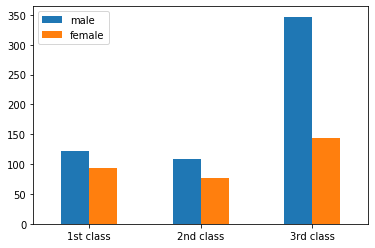

In [148]:
# 4 create a bar plot with seperate bars for male/female passengers and 1st/2nd/3rd class 

# count male and females per passenger class
male_count = df[df['Sex']=='male'].groupby(["Pclass"])["Pclass"].count()
female_count = df[df['Sex']=='female'].groupby(["Pclass"])["Pclass"].count()
print('male', male_count, 'female', female_count)

male_count = male_count.to_list()
female_count = female_count.to_list()
index = ['1st class', '2nd class', '3rd class']

plot_df = pd.DataFrame({'male': male_count,
                    'female': female_count}, index=index)
ax = plot_df.plot.bar(rot=0)


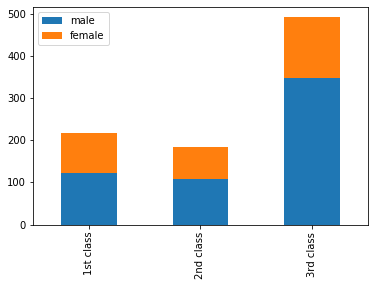

In [149]:
plot_df[["male", "female"]].plot(kind="bar", stacked=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a2ac2f110>,
      dtype=object)

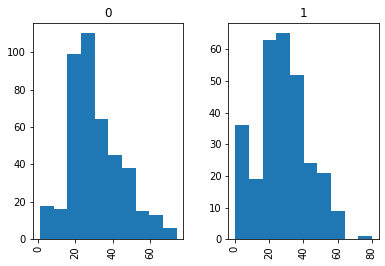

In [150]:
# 5 create a histogram showing the age distribution of passengers
# compare surviving/non-surviving passengers in the histogram
df['Age'].hist(by=df['Survived'])
#plt.xticks(range(0,80, 10))
#plt.yticks(range(0,120, 10))


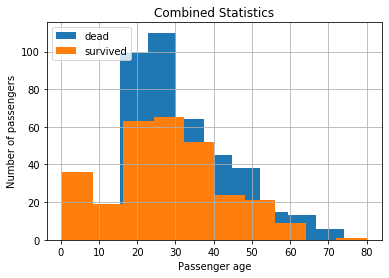

In [151]:
df['Age'].groupby(by=df["Survived"]).hist()

plt.title('age distribution of passengers comparing surviving/non-surviving passengers')
plt.title("Combined Statistics")
plt.xlabel("Passenger age")
plt.ylabel("Number of passengers")
labels=['dead','survived']
plt.legend(labels=labels,loc="upper left")

In [153]:
# 6 calculate the average age fur survived and drowned passengers

average_age_survived = df[df['Survived']==1]['Age'].mean()
average_age_drowned = df[df['Survived']==0]['Age'].mean()

print('average_age_survived: ', average_age_survived, 
      '\naverage_age_drowned:', average_age_drowned)


average_age_survived:  28.343689655172415 
average_age_drowned: 30.62617924528302


In [154]:
df["Age"].isna().sum()

177

In [155]:
# 7 replace missing age values by the mean age
df['Age'].fillna(df['Age'].mean(), inplace=True)
df["Age"].isna().sum()

0

In [156]:
# create a table counting the number of surviving/dead passengers separately
# for 1st/2nd/3rd class and male/female

import numpy as np
# create a subset
df_sub = df[['Survived', 'Pclass', 'Sex']]

# transform survived col to boolean
df['Survived'] = df['Survived'].astype(bool)
df_sub.head()

,Survived,Pclass,Sex
0,0,3,male
1,1,1,female
2,1,3,female
3,1,1,female
4,0,3,male


In [157]:
# create a dead passenger column
df_sub['Dead'] = np.logical_xor(df['Survived'],1)
df_sub.head()

/Users/lara/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Survived,Pclass,Sex,Dead
0,0,3,male,True
1,1,1,female,False
2,1,3,female,False
3,1,1,female,False
4,0,3,male,True


In [158]:
df_sub.head()

,Survived,Pclass,Sex,Dead
0,0,3,male,True
1,1,1,female,False
2,1,3,female,False
3,1,1,female,False
4,0,3,male,True


In [159]:
# groupby subset by passenger class and sex and apply aggregation function to the groups  
df_sub.groupby(["Pclass", 'Sex']).sum().astype(int)

Survived  Dead
Pclass Sex                   
1      female        91     3
       male          45    77
2      female        70     6
       male          17    91
3      female        72    72
       male          47   300

In [160]:
df1= df_sub.groupby(["Pclass", 'Sex']).sum().astype(int).unstack()
df1

Survived        Dead     
Sex      female male female male
Pclass                          
1            91   45      3   77
2            70   17      6   91
3            72   47     72  300

In [161]:
df_sub.groupby(["Pclass", 'Sex']).sum().astype(int).unstack(0)

Survived         Dead         
Pclass        1   2   3    1   2    3
Sex                                  
female       91  70  72    3   6   72
male         45  17  47   77  91  300

In [162]:
df1.unstack([])

Survived        Dead     
Sex      female male female male
Pclass                          
1            91   45      3   77
2            70   17      6   91
3            72   47     72  300

In [164]:
df_sub.groupby(["Pclass", 'Sex']).sum().astype(int).stack([])

Survived  Dead
Pclass Sex                   
1      female        91     3
       male          45    77
2      female        70     6
       male          17    91
3      female        72    72
       male          47   300

### more exploratory plots:

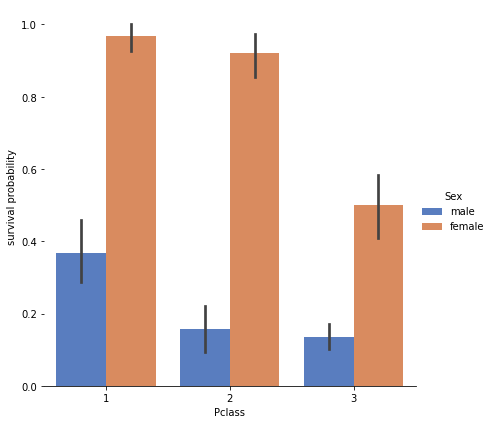

In [165]:
 #Draw a nested barplot to show survival for class and sex
g = sns.catplot(x="Pclass", y="Survived", hue="Sex", data=df,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("survival probability")

<Figure size 720x504 with 0 Axes>

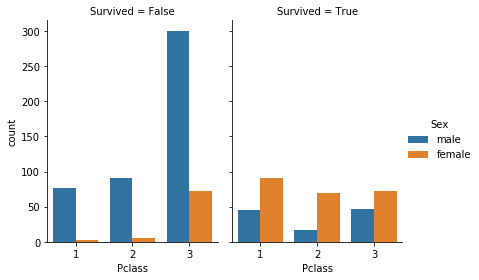

In [166]:
fig = plt.figure(figsize=(10, 7))
cp = sns.catplot(x="Pclass", hue="Sex", col="Survived",data=df, kind="count",height=4, aspect=.7)

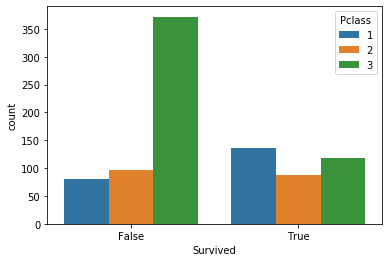

In [167]:
ax = sns.countplot(x="Survived", hue="Pclass", data=df)

In [ ]:
# seaborn distplot